Text(0, 0.5, 'Loss')

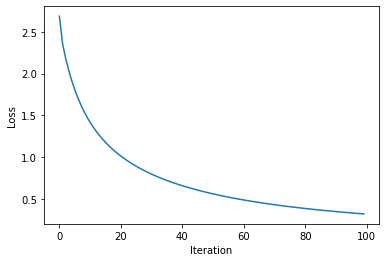

In [31]:
# Single-layer neural network using automatic differentiation
# Training data for NAND.
import torch
import matplotlib.pyplot as plt

dtype = torch.float

# 4 rows x 3 cols
x = torch.tensor([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype = dtype)
# 4 rows x 1 col
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)    
# 3 rows x 1 col
w = torch.randn(3, 1, dtype = dtype, requires_grad = True)

loss_history = [] 

eta = 0.5

for t in range(100):
    y_pred    = x.mm(w).sigmoid()
    evalValue = y * y_pred + (1 - y) * (1 - y_pred)
    loss      = -evalValue.log().sum()
    loss.backward()
    loss_history.append(loss.item()) 

    with torch.no_grad():
        # Update weights using SGD.  
        w -= eta * w.grad
        # Clear the gradients for the next iteration.
        w.grad.zero_() 
        
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
        

Text(0, 0.5, 'Loss')

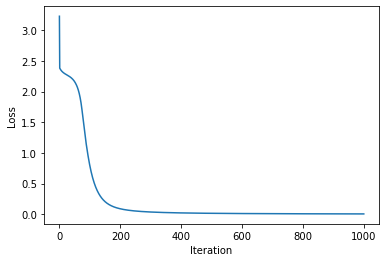

In [33]:
# Multi-layer neural network using automatic differentiation
# Training data for XOR.
import torch
import matplotlib.pyplot as plt

dtype = torch.float

# 4 rows x 3 cols
x = torch.tensor([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype = dtype)
# 4 rows x 1 col
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)   
# 3 rows x 2 col
w1 = torch.randn(3, 2, dtype = dtype, requires_grad = True)
# 2 rows x 1 col
w2 = torch.randn(2, 1, dtype = dtype, requires_grad = True)
# 1 rows x 1 col
b  = torch.randn(1, 1, dtype = dtype, requires_grad = True)

loss_history = []

eta = 0.5

for t in range(1000):
    y_pred    = x.mm(w1).sigmoid().mm(w2).add(b).sigmoid()
    evalValue = y * y_pred + (1 - y) * (1 - y_pred)
    loss      = -evalValue.log().sum()
    loss.backward()
    loss_history.append(loss.item()) 
    
    with torch.no_grad():
        # Update weights using SGD.  
        w1 -= eta * w1.grad
        w2 -= eta * w2.grad
        b  -= eta * b.grad
        # Clear the gradients for the next iteration.
        w1.grad.zero_() 
        w2.grad.zero_() 
        b.grad.zero_() 
        
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
        

Text(0, 0.5, 'Loss')

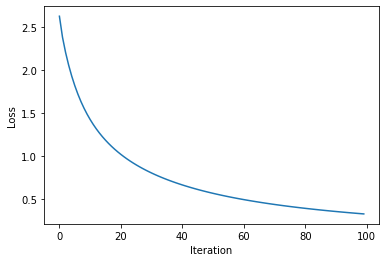

In [72]:
import torch
import matplotlib.pyplot as plt

dtype = torch.float

# Training data for NAND.
# 4 rows x 3 cols
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype = dtype)
# 4 rows x 1 col
y = torch.tensor([[1], [1], [1], [0]], dtype = dtype)
                                        
# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1, bias=True),  
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

loss_history = []

eta = 0.5
for t in range(100):
    y_pred = model(x)                   
    loss   = loss_fn(y_pred, y)           
    loss_history.append(loss.item())    
    model.zero_grad()                   
    loss.backward()                     
        
    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad   

plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

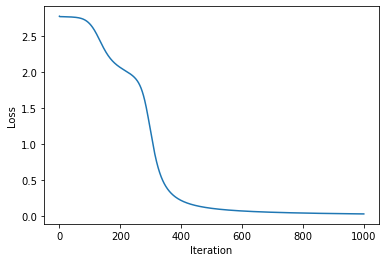

In [76]:
import torch
import matplotlib.pyplot as plt

dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2, bias=True),   # 2 dims (with bias) -> 2 dims
    torch.nn.Sigmoid(),                 # Sigmoid function
    torch.nn.Linear(2, 1, bias=True),   # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

loss_history = []

eta = 0.5
for t in range(1000):
    y_pred = model(x)                   # Make predictions.
    loss = loss_fn(y_pred, y)           # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    model.zero_grad()                   # Zero-clear the gradients.
    loss.backward()                     # Compute the gradients.
        
    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad   # Update the parameters using SGD.

plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')